<h1>AirBnB Boston Analysis</h1>

<br>

<p>For this analysis I will answer the following 3 questions:</p>
<ul>
  <li>What are the price distributions for each type of room? </li>
  <li>What are the features that highly correlate to price? </li>
  <li>What are the most expensive zipcodes in Boston?</li>
</ul>    

<p> This notebook will follow the CRISP - DM process</p>


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Notebook options
pd.options.display.max_rows = 99999
pd.options.display.max_columns = 99999
pd.options.display.float_format = '{:20,.3f}'.format

## Get the data

<p>In this first section of the notebook we will get the data which will be used for the analysis. 
The data comes from CSV sources. Lets look at each one of these more closely to see which one we will use for our analysis.</p>

In [2]:
path_to_data = "/Users/dgrijalva/udacity/DataScience/Projects/BlogPost/boston-airbnb-open-data"

In [3]:
calendar = pd.read_csv('{}/calendar.csv'.format(path_to_data))
listings = pd.read_csv('{}/listings.csv'.format(path_to_data))
reviews = pd.read_csv('{}/reviews.csv'.format(path_to_data))

In [4]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,nan,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.283,-71.133,t,House,Entire home/apt,4,1.500,2.000,3.000,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",nan,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,nan,0,0,0,0,2016-09-06,0,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,f,nan,nan,f,moderate,f,f,1,nan
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [5]:
calendar.head(2)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN


In [6]:
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...


<p>After further review of each CSV file I notice that the most useful one for our task its the listing one. This 
file contains information about the listing itself, including price information</p>

## Clean and explore the data

Now lets look at each CSV closer.  Lets examine the shape of each one and how what its the percentage of missing data
per columns

In [7]:
def summary(data):
    """ Provides a summary of the dataset
    It prints the shape of the dataset and the percentage of missing values for each column.
    
    Parameters:
    data (DF): FataFrame to be summarized

    Returns:
    two print statments
    """
    print('Shape: {}'.format(data.shape))
    print((data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100)

In [8]:
summary(calendar)

Shape: (1308890, 4)
price                 50.872
dtype: float64


In [9]:
summary(listings)

Shape: (3585, 95)
summary                                       3.989
space                                        29.484
neighborhood_overview                        39.470
notes                                        55.091
transit                                      35.983
access                                       41.534
interaction                                  43.347
house_rules                                  33.250
thumbnail_url                                16.709
medium_url                                   16.709
xl_picture_url                               16.709
host_location                                 0.307
host_about                                   36.513
host_response_time                           13.138
host_response_rate                           13.138
host_acceptance_rate                         13.138
host_neighbourhood                            9.456
neighbourhood                                15.146
neighbourhood_group_cleansed                10

In [10]:
summary(reviews)

Shape: (68275, 6)
comments                  0.078
dtype: float64


After further reviewing the listing CSV I identified the most useful features for us to answer or price related questions.
The features are the following:

- reviews_per_month: The number of reviews the listing has per month
    
- host_acceptance_rate: The rate of booking acceptance
    
- accommodates: The number of guests that can be accommodated in the property
    
- bathrooms: The number of bathrooms in the property
    
- bedrooms: The number of bedrooms in the property
    
- beds: The number of beds in the property
    
- price: The price per night for the booking
    
- host_response_rate: The responsiveness of the host, in hours or days
    
- zipcode: The zip code where the property is located
    
- property_type: The property type (House, apartment, etc)
    
- room_type: The room type (private room, entire house/apartment, shared room)
    
- neighbourhood_cleansed: The neighborhood where the property is located
    
- minimum_nights: The minimum nights that needed to complete the booking

These are also the columns with the least missing values. 

I notice that the price columns values are strings. We will have to convert them to floats in order to continue
with the analysis. I have created a function that gets rid of the '$' sign and converts the number to a float.
The columns that hold percentages have the same problem. The values are expressed as strings. I wrote a different function that changes this percentage to a float.

To ensure that all the zip code column values are 5 digits long I create a function that takes care of this and also coverts the values to integers.

In [11]:
# lets clean data

columns_to_keep = ['id', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                    'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude', 'property_type', 'room_type',
                   'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'reviews_per_month']

new_listings = listings[columns_to_keep].copy()
def clean_prices(x):
    """Cleans the price colums
    transform data from $2,000 to 2000
    

    """
    x = float(x[1:].replace(',',''))
    return x


def clean_percentages(x):
    """ cleans the percentages columns
    transforms data from 20% to 0.20
    """
    x = float(x[:-1])/100
    return x


    
def clean_zipcode(x):
    """cleans the zip code columns
    Makes sures each zip code only has 5 digets and converts it to a interger
    """
    x = x[:5]
    return int(x)

The reason I have decided to keep those columns is because the are provavly the most relevant for the analysis and these features have a low percentage of missing values compared to other features

Here we can see that most columns in the slice dataframe have less than 500 missing values.  The column that has the most missing values is 'reviews_per_month'. Unfortunatly I feel that this feature would highly corretaly with price so for this analysis its not worth getting rid of this feature.

Since the total amount of missing values is not that high (per column) I will drop of all these missing values. 

In [12]:
print(new_listings.shape)
new_listings.isnull().sum()[new_listings.isnull().sum()>0]

(3585, 18)


host_response_time      471
host_response_rate      471
host_acceptance_rate    471
zipcode                  38
property_type             3
bathrooms                14
bedrooms                 10
beds                      9
reviews_per_month       756
dtype: int64

In [13]:
new_listings = new_listings.dropna()
new_listings.shape

(2546, 18)

### Apply cleaning functions to the data 

In [14]:
new_listings['zipcode'] = new_listings['zipcode'].apply(lambda x: clean_zipcode(x))
new_listings['price'] = new_listings['price'].apply(lambda x: clean_prices(x))
new_listings['host_response_rate'] = new_listings['host_response_rate'].apply(lambda x: clean_percentages(x))
new_listings['host_acceptance_rate'] = new_listings['host_acceptance_rate'].apply(lambda x: clean_percentages(x))

### Enconde the data

There are quite a few categorical features, since we will not be doing any machine learning we wil not have to create dummy valiables for these features. But we will want to turn these values into numbers rather than the current values.

I will use the replace function to get this done.  In this case we do not need to create the dummy variables because we are only categorizing these values. So one value having a higher higher number than the other will not affect anything. 

In [15]:
new_listings.replace({'within an hour': 0,
                         'within a few hours': 1,
                         'within a day': 2,
                         'a few days or more': 3}, inplace=True)

new_listings.replace({'Entire home/apt': 0, 
                       'Shared room':1, 
                       'Private room':2}, inplace=True)

new_listings.replace({'Apartment':0,
 'Bed & Breakfast':1,
 'Boat':2,
 'Condominium':3,
 'Dorm':4,
 'Entire Floor':5,
 'Guesthouse':6,
 'House':7,
 'Loft':8,
 'Other':9,
 'Townhouse':10,
 'Villa':11}, inplace=True)

new_listings.replace({'Allston':0,
 'Back Bay':1,
 'Bay Village':2,
 'Beacon Hill':3,
 'Brighton':4,
 'Charlestown':5,
 'Chinatown':6,
 'Dorchester':7,
 'Downtown':8,
 'East Boston':9,
 'Fenway':10,
 'Hyde Park':11,
 'Jamaica Plain':12,
 'Leather District':13,
 'Longwood Medical Area':14,
 'Mattapan':15,
 'Mission Hill':16,
 'North End':17,
 'Roslindale':18,
 'Roxbury':19,
 'South Boston':20,
 'South Boston Waterfront':21,
 'South End':22,
 'West End':23,
 'West Roxbury':24},inplace=True)

In [16]:
new_listings.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,reviews_per_month
1,3075044,0,1.000,1.000,f,18,2131,42.286,-71.134,0,2,2,1.000,1.000,1.000,65.000,2,1.300
2,6976,1,1.000,0.880,t,18,2131,42.292,-71.136,0,2,2,1.000,1.000,1.000,65.000,3,0.470
4,7651065,0,1.000,1.000,t,18,2131,42.285,-71.136,7,2,2,1.500,1.000,2.000,79.000,2,2.250
5,12386020,1,1.000,0.950,t,18,2131,42.292,-71.132,3,2,2,1.000,1.000,1.000,75.000,2,1.700
6,5706985,0,0.980,0.960,f,18,2131,42.281,-71.131,0,0,3,1.000,1.000,2.000,100.000,1,4.000


## Model and evaluate the data 

## Question 1 

<p> What are the price distributions for each type of room?</p>

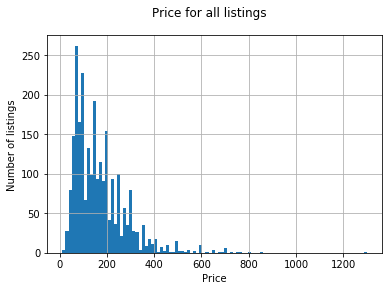

In [17]:
new_listings['price'].hist(bins=100);
plt.suptitle("Price for all listings");   
plt.xlabel('Price');
plt.ylabel('Number of listings');


The range for 'Price for all listings' goes from $20 to $1,300. This spread is huge and is mainly caused by a few outliers. So let's look at all the prices under $1,000.

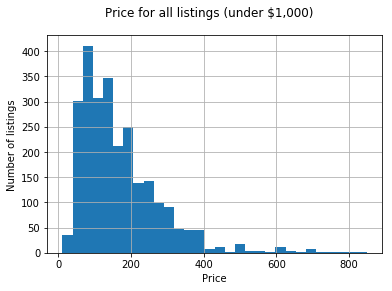

In [18]:
new_listings[new_listings['price'] <1000].price.hist(bins=30);
plt.suptitle("Price for all listings (under $1,000)");   
plt.xlabel('Price');
plt.ylabel('Number of listings');


The the bulk of all listings for 'Price for all listings (under $1,000) are in the $40 to $140 price range. 



In [20]:
room_types = list(set(new_listings['room_type']))

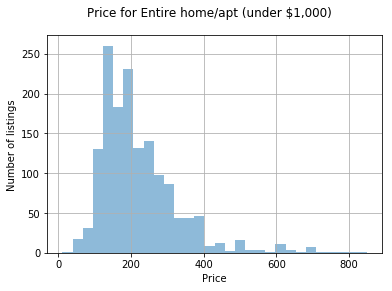

In [21]:
new_listings[(new_listings['price'] <1000) & (new_listings['room_type'] == room_types[0])].price.hist(bins=30, alpha=0.5);                                                                                            
plt.suptitle("Price for Entire home/apt (under $1,000)");   
plt.xlabel('Price');
plt.ylabel('Number of listings');


We can see that the bulk of all entire house/apt listings ranges from approximately $150 to $220.

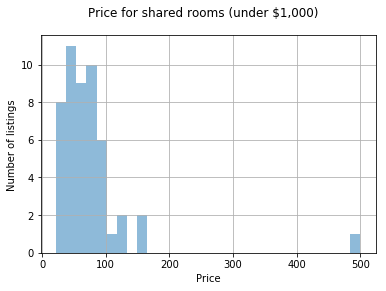

In [22]:
new_listings[(new_listings['price'] <1000) & (new_listings['room_type'] == room_types[1])].price.hist(bins=30, alpha=0.5);
plt.suptitle("Price for shared rooms (under $1,000)");
plt.xlabel('Price');
plt.ylabel('Number of listings');




We can see that the bulk of all shared room listings ranges from approximately $20 to $100.

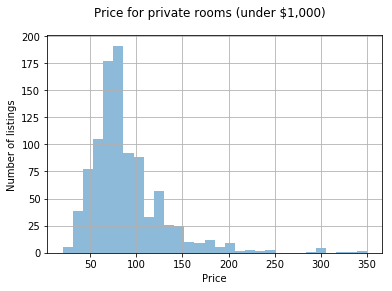

In [24]:
new_listings[(new_listings['price'] <1000) & (new_listings['room_type'] == room_types[2])].price.hist(bins=30, alpha=0.5);
plt.suptitle("Price for private rooms (under $1,000)");
plt.xlabel('Price');
plt.ylabel('Number of listings');


We can see that the bulk of all shared room listings ranges from approximately $60 to $80.

In [25]:
def roomType_price_ranges(df, room_type):
    """This funcion helps analyze the price for each room type
    It out puets the highest price, the lowerst price and the difference between the highest and the lowerst price
    
    Parameters:
    df (DF): Dataframe
    

    Returns:
    int: Max price
    int: Min price
    int: price spread


    """
    if room_type == 0:
        df = df[df['room_type']==0]
    elif room_type == 1:
        df = df[df['room_type']==1]    
    elif room_type == 2:
        df = df[df['room_type']==2]
    return df['price'].max(), df['price'].min(), df['price'].max()-df['price'].min()


In [26]:
for i in set(new_listings['room_type']):
    high, low, spread = roomType_price_ranges(new_listings,i)
    print('Room Type: {}'.format(i))
    print('High:{:,}'.format(high))
    print('Low:{:,}'.format(low))
    print('Spread:{:,}\n'.format(spread))
    

Room Type: 0
High:1,300.0
Low:11.0
Spread:1,289.0

Room Type: 1
High:500.0
Low:22.0
Spread:478.0

Room Type: 2
High:350.0
Low:20.0
Spread:330.0



Here we have a small summary of all the prices distributions per room type

<p>There is a share room that has a price of $750. Lets fin out in what neighbourhood this room is. </p>

In [27]:
new_listings[(new_listings['room_type']==1) & (new_listings['price']==750)]

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,reviews_per_month


## Question 2 

<p>What are the features that highly correlate to price?</p>

Text(0.5, 1.0, 'Reviews per month vs price')

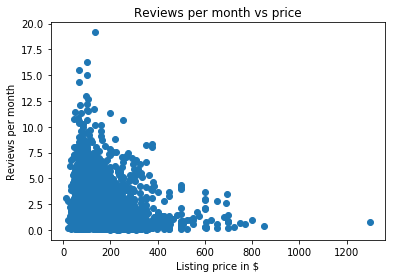

In [28]:
plt.scatter(new_listings['price'],new_listings['reviews_per_month'])
plt.ylabel('Reviews per month')
plt.xlabel('Listing price in $')
plt.title('Reviews per month vs price')

Originally I thought that reviews per month was going to be highly correlated to price. In the above groah we can see that my hypotesis is difficult to prove. Most of the data points fall under to 500 price.  To analyze this more in depth we will be looking at the pearson correlation of all the numerical features.

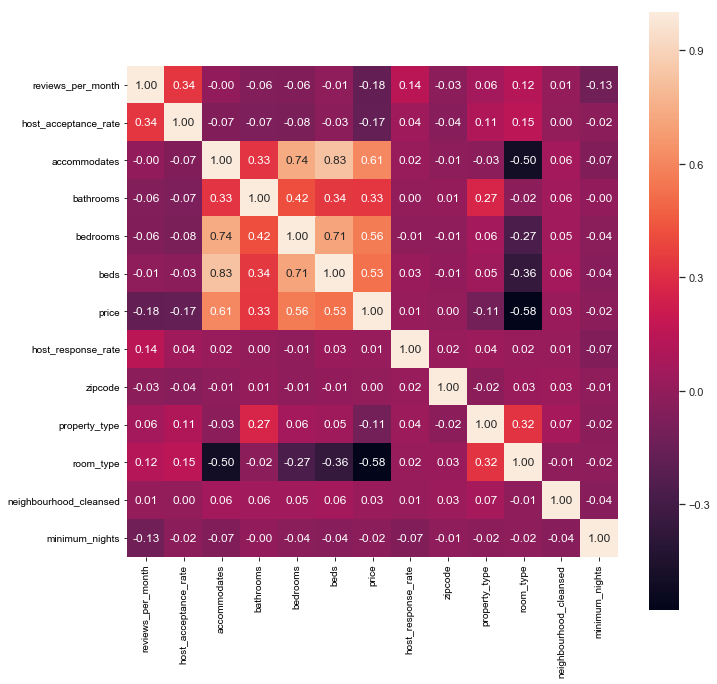

In [29]:
cols = ['reviews_per_month','host_acceptance_rate','accommodates',
       'bathrooms','bedrooms','beds','price', 'host_response_rate','zipcode', 'property_type',
       'room_type', 'neighbourhood_cleansed','minimum_nights']


corrs = np.corrcoef(new_listings[cols].values.T)
fig, ax = plt.subplots(figsize=(11,11))
sns.set(font_scale=1)
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols)

<p>The features that highly correlate with price are:</p>
<ul>
<li>Accomodates</le>
<li>Bedrooms</li>
<li>Beds</li>
</ul>

## Question 3 

<p>What are the most expensive zipcodes in Boston?</p>

In [30]:
new_listings[(new_listings['price'] == 1300)].zipcode

1022    2118
Name: zipcode, dtype: int64

In [31]:
new_listings[(new_listings['price'] == 1300)]

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,reviews_per_month
1022,8303267,1,1.000,0.830,t,22,2118,42.342,-71.075,7,0,8,4.500,5.000,6.000,"1,300.000",5,0.750


In [32]:
new_listings['price'].describe()

count              2,546.000
mean                 167.381
std                  111.203
min                   11.000
25%                   85.000
50%                  146.500
75%                  219.000
max                1,300.000
Name: price, dtype: float64

In [37]:
mean = np.mean(new_listings['price'])
percentile = np.percentile(new_listings['price'], 98)
print(percentile)
y = new_listings[(new_listings['price'] > percentile) ][['price', 'zipcode']]
y.shape

500.0


(38, 2)

From the analysis above we can see that 98 percentile of the data falls under the 500 price mark. In othe words, only 38 listings have a price higher than 500. 

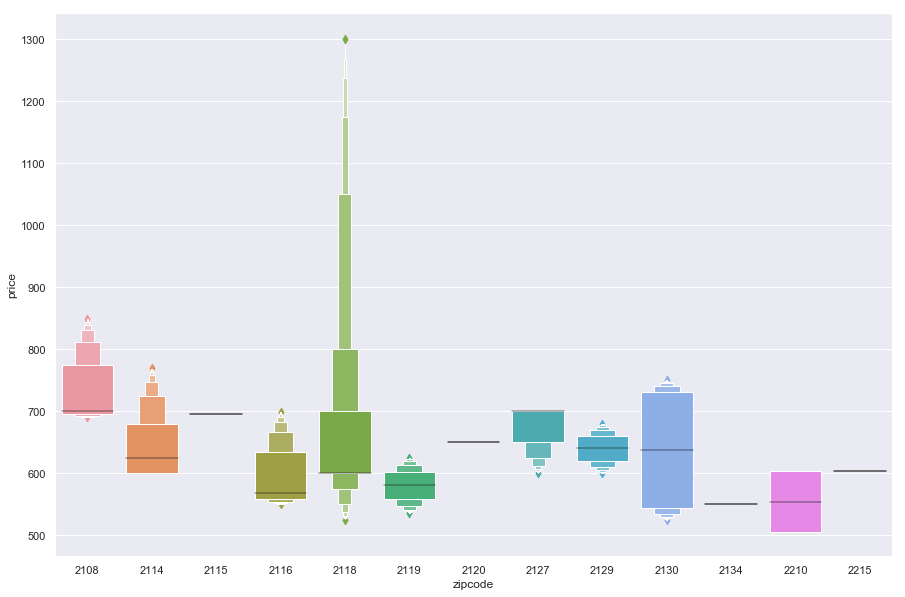

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxenplot(y.zipcode, y.price);

From the chart above we can see that zipcode 2118 is the one with the higest spread of price. So, this zip code happens to also be the one with the most expensive listings.

## Conclusion 

- The most expensive listing in the dataset is 1,300 per night
- The zip code with the most expensive listing and also the one with the highest spread its 2118
- The 3 features that have the highest correlation with price are: 
    
    1)Accomodates
    
    2)Bedrooms 
    
    3) Beds



